In [167]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data

import requests 
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

req = requests.get(url)

print(req)

<Response [200]>


In [168]:
soup = BeautifulSoup(req.text, "html.parser")

whole = soup.find("div", id = "style-1")

table = whole.find_all("table", class_="historical_data_table table")[1]

rows = table.find_all("tr")

print(table)



<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744<

In [169]:
headers_list= ["Date", "Revenue"]

print(headers_list)

df = pd.DataFrame(columns=headers_list)

['Date', 'Revenue']


In [170]:
row_list = []

for i in rows[1:]:
    data = i.find_all("td")
    rows = [tr.text for tr in data]
    
    l = len(df)
    df.loc[l] = rows
print(df)    

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

In [171]:
df.to_excel("C:\\Users\\Shivam\\Desktop\\Tesla.xlsx")

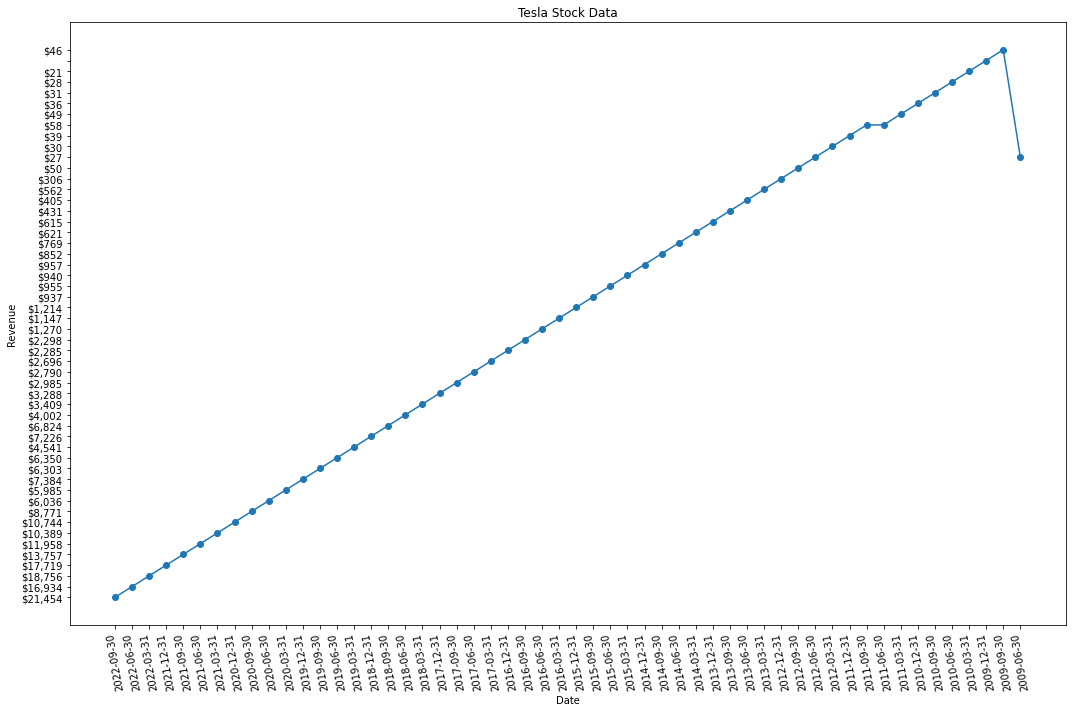

In [172]:
def make_graph(data, revenue, title):
    plt.figure(figsize=(15, 10))
    plt.plot(data, revenue, marker='o', linestyle='-')
    plt.title(title + ' Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.xticks(rotation=100)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    
make_graph(df['Date'], df['Revenue'], 'Tesla')